In [1]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 340 kB/s 


In [2]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from numpy import mean
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import operator
import itertools
import operator
from itertools import islice
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
data = pd.read_excel('data-2-2.xlsx')
del data['Unnamed: 0']
data = data.rename(columns={'TOTS.1': 'TOTS_Teammates'})

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92120 entries, 0 to 92119
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  92120 non-null  int64  
 1   Name                92120 non-null  object 
 2   Age                 92120 non-null  int64  
 3   Height_cm           92120 non-null  int64  
 4   Weight_kg           92120 non-null  int64  
 5   Country             92120 non-null  object 
 6   Club                92120 non-null  object 
 7   League              92120 non-null  object 
 8   Division            92120 non-null  int64  
 9   Joined              92120 non-null  object 
 10  Position            92120 non-null  object 
 11  Foot                92120 non-null  object 
 12  IntReputation       92120 non-null  int64  
 13  Crossing            92120 non-null  int64  
 14  Finishing           92120 non-null  int64  
 15  Heading_accuracy    92120 non-null  int64  
 16  Shor

In [5]:
check_df = data[['Country', 'IsNational']].drop_duplicates()['Country'].value_counts()

In [6]:
to_del = check_df[check_df == 1].index

In [7]:
data = data[~data.Country.isin(to_del)]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92120 entries, 0 to 92119
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  92120 non-null  int64  
 1   Name                92120 non-null  object 
 2   Age                 92120 non-null  int64  
 3   Height_cm           92120 non-null  int64  
 4   Weight_kg           92120 non-null  int64  
 5   Country             92120 non-null  object 
 6   Club                92120 non-null  object 
 7   League              92120 non-null  object 
 8   Division            92120 non-null  int64  
 9   Joined              92120 non-null  object 
 10  Position            92120 non-null  object 
 11  Foot                92120 non-null  object 
 12  IntReputation       92120 non-null  int64  
 13  Crossing            92120 non-null  int64  
 14  Finishing           92120 non-null  int64  
 15  Heading_accuracy    92120 non-null  int64  
 16  Shor

In [9]:
data = data.fillna(0)

In [10]:
data['target'] = 0
data.loc[data.Skill1 >= 80, 'target'] = 1

In [11]:
data.head(20)

,ID,Name,Age,Height_cm,Weight_kg,Country,Club,League,Division,Joined,Position,Foot,IntReputation,Crossing,Finishing,Heading_accuracy,Short_passing,Volleys,Dribbling,Curve,FK_accuracy,Long_passing,Ball_control,Acceleration,Sprint_speed,Agility,Reactions,Balance,Shot_power,Jumping,Stamina,Strength,Long_shots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,Standing_tackle,Sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,Value,IsNational,TOTS,DEGREE,Eigv,National_teammates,TOTS_teammates,Year,Skill1,Skill2,Skill3,Skill4,Skill5,KPI_IsNational,KPI_IsTOTS,target
0,2,G. Pasquale,29,182,72,Italy,Udinese,Italian Serie A,1,2008-01-01 00:00:00.000000,LB,Left,2,73,50,60,70,56,69,68,60,69,71,77,77,68,75,64,74,67,79,73,68,78,76,65,39,62,71,75,74,14,5,15,10,12,1200000.0,0,0,30,2.777714e-04,10,2,2012,75,74,76,71,75,0.206445,0.236646,0
1,2,G. Pasquale,30,182,72,Italy,Udinese,Italian Serie A,1,2008-07-01 00:00:00.000000,LM,Left,2,75,50,60,70,56,69,68,60,69,71,77,74,68,75,64,74,67,79,73,68,78,76,68,44,62,71,75,74,14,5,15,10,12,1500000.0,0,0,46,4.378465e-02,13,3,2013,75,74,76,71,75,0.224802,0.252077,0
2,2,G. Pasquale,31,181,82,Italy,Torino,Italian Serie A,1,2008-07-01 00:00:00.000000,LB,Left,2,77,50,60,69,58,64,68,60,69,70,68,73,67,73,66,74,67,77,70,67,78,73,64,52,50,71,74,74,14,5,15,10,12,1000000.0,0,0,71,4.189903e-02,23,5,2014,74,74,73,70,73,0.266780,0.269473,0
3,2,G. Pasquale,32,181,82,Italy,Udinese,Italian Serie A,1,2008-07-01 00:00:00.000000,LM,Left,2,74,49,60,70,57,70,67,59,68,70,68,74,68,68,68,73,68,74,72,67,76,72,62,60,49,69,73,73,13,4,14,9,11,500000.0,0,0,89,3.492187e-02,29,4,2015,73,73,72,70,68,0.274133,0.257974,0
4,2,G. Pasquale,33,182,82,Italy,Udinese,Italian Serie A,1,2008-07-01 00:00:00.000000,LB,Left,2,75,50,59,71,58,73,65,60,69,71,68,74,68,69,68,74,68,69,68,68,72,69,63,66,50,70,69,69,14,5,15,10,12,300000.0,0,0,99,3.228421e-02,31,4,2016,69,69,69,71,69,0.286640,0.251539,0
5,6,A. Scarpi,38,188,83,Italy,Genoa,Italian Serie A,1,2007-01-01 00:00:00.000000,GK,Right,2,12,12,15,25,14,13,11,14,24,11,55,55,48,70,43,36,72,50,69,11,40,20,13,42,14,16,9,17,69,70,66,73,70,50000.0,0,0,26,1.836119e-10,10,0,2012,70,69,73,70,70,0.186505,0.203434,0
6,11,R. Rocchi,31,183,75,France,FC Metz,French Ligue 2,2,2013-07-01 00:00:00.000000,CM,Right,1,64,54,60,72,61,63,69,49,67,73,64,59,74,68,63,72,70,90,79,70,63,63,61,72,65,46,56,57,6,7,10,7,12,400000.0,0,0,23,3.807492e-04,2,1,2014,72,73,63,72,67,0.171248,0.212852,0
7,11,R. Rocchi,32,183,75,France,FC Metz,French Ligue 1,1,2013-07-01 00:00:00.000000,CM,Right,1,59,49,54,68,55,60,62,44,64,68,51,52,65,63,58,67,64,53,67,66,57,58,58,66,60,42,54,52,6,7,10,7,12,250000.0,0,0,35,1.070477e-03,10,1,2015,68,68,60,66,64,0.188892,0.199227,0
8,16,Luis Garcia,30,177,69,Spain,Real Zaragoza,Spain Primera Division,1,2011-01-01 00:00:00.000000,ST,Right,1,71,74,55,69,77,80,78,85,61,82,74,76,78,72,72,81,66,79,68,80,71,22,78,60,79,26,25,21,8,11,12,10,10,4000000.0,0,0,20,1.052011e-21,7,1,2012,82,80,60,69,74,0.195138,0.229686,1
9,16,Luis Garcia,31,177,69,Spain,Tigres U.A.N.L.,Mexican Liga MX,1,2012-01-01 00:00:00.000000,CAM,Right,1,71,65,61,69,67,72,76,66,57,78,71,74,76,71,72,71,68,70,71,68,67,32,74,55,75,26,35,21,8,11,12,10,10,1800000.0,0,0,42,1.230010e-03,14,1,2013,78,72,55,69,65,0.209532,0.214664,0


In [48]:
feature_list = ['Country', 'League', 'Division', 'Position', 'Value', 'DEGREE', 'Eigv', 'National_teammates', 'TOTS_teammates', 'TOTS', 'Skill2', 'Skill3', 'Skill4', 'Skill5', 'IsNational']
target = 'target'

X = data[feature_list]
y = data[target]

In [49]:
data[target].value_counts()

0    85048
1     7072
Name: target, dtype: int64

In [50]:
#Encoding the categorival variables using target encoding
cbe_encoder = ce.cat_boost.CatBoostEncoder()
X_imp = cbe_encoder.fit_transform(X,y)

#Standardization 
scaler = StandardScaler()
X_imp_st = scaler.fit_transform(X_imp)
X_imp_st = pd.DataFrame(data = X_imp_st, columns=X_imp.columns)

#Normalization
transformer = MinMaxScaler()
X_imp_st_n = transformer.fit_transform(X_imp_st)
X_imp_st_n = pd.DataFrame(data = X_imp_st_n, columns=X_imp_st.columns)

In [51]:
#Create metric df to save model results
metric_df = pd.DataFrame(columns=['model','fit_time','score_time', 'acc', 'recall', 'auc', 'precision', 'f1'])

In [52]:
# define the model
model = XGBClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

In [53]:
# define the model
model = AdaBoostClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

In [54]:
# define the model
model = GradientBoostingClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

In [55]:
# define the model
model = RandomForestClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

In [56]:
# define the model
model = BaggingClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

In [57]:
# define the model
model = LogisticRegression()

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

In [58]:
# define the model
model = GaussianNB()

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

In [59]:
from sklearn import svm

# define the model
model = svm.SVC()

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [60]:
#Check model performances
metric_df.sort_values(by = 'acc', ascending = False)

,model,fit_time,score_time,acc,recall,auc,precision,f1
4,"BaggingClassifier(base_estimator=None, bootstr...",57.6199,0.265566,0.969925,0.738335,0.980823,0.850504,0.790213
3,"RandomForestClassifier(bootstrap=True, ccp_alp...",12.2706,0.216026,0.969914,0.729144,0.982402,0.857774,0.788016
2,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",19.6641,0.0502723,0.965626,0.72575,0.982494,0.807385,0.764173
0,"XGBClassifier(base_score=0.5, booster='gbtree'...",5.44903,0.063713,0.965214,0.696903,0.98178,0.823155,0.754557
5,"LogisticRegression(C=1.0, class_weight=None, d...",1.51001,0.031691,0.964313,0.6764,0.979761,0.827491,0.744157
7,"SVC(C=1.0, break_ties=False, cache_size=200, c...",61.9937,8.76504,0.964286,0.659856,0.974271,0.841021,0.739301
1,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",8.74186,0.286312,0.963965,0.701923,0.979809,0.804276,0.749392
6,"GaussianNB(priors=None, var_smoothing=1e-09)",0.0512949,0.0380073,0.923138,0.849831,0.95742,0.499769,0.629351


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_imp_st_n, y, test_size=0.33, random_state=42)

In [62]:
# define the model
model = RandomForestClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

# report performance
for key, value in n_scores.items():
    print(key, mean(value))

fit_time 7.842444574832916
score_time 0.14924637079238892
test_acc 0.9681140635126377
test_recall 0.7127398591751174
test_auc 0.9799709854572667
test_precison 0.8467212532957602
test_f1 0.7737065821421736


In [63]:
m = model.fit(X_train, y_train)
y_pred = m.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.8570739033933331


In [65]:
ns_fpr, ns_tpr, _ = roc_curve(y_test,y_pred)

No handles with labels found to put in legend.


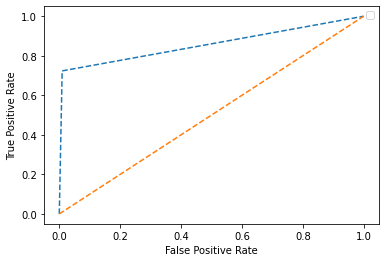

In [66]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot([0, 1], ls="--")
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [67]:
confusion_matrix(y_test, y_pred)

array([[27787,   265],
       [  649,  1699]])

In [ ]:
##DIFFERENT ENCODING

In [68]:
#Create metric df to save model results
encoding_metric_df = pd.DataFrame(columns=['encoder','fit_time','score_time', 'acc', 'recall', 'auc', 'precision', 'f1'])

In [69]:
#Encoding the categorival variables using target encoding
cbe_encoder = ce.cat_boost.CatBoostEncoder()
X_imp = cbe_encoder.fit_transform(X,y)

#Standardization 
scaler = StandardScaler()
X_imp_st = scaler.fit_transform(X_imp)
X_imp_st = pd.DataFrame(data = X_imp_st, columns=X_imp.columns)

#Normalization
transformer = MinMaxScaler()
X_imp_st_n = transformer.fit_transform(X_imp_st)
X_imp_st_n = pd.DataFrame(data = X_imp_st_n, columns=X_imp_st.columns)

# define the model
model = RandomForestClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(cbe_encoder)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

encoding_metric_df = encoding_metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(encoding_metric_df.columns)), ignore_index=True)

In [70]:
#Encoding the categorival variables using target encoding
cbe_encoder = ce.MEstimateEncoder()
X_imp = cbe_encoder.fit_transform(X,y)

#Standardization 
scaler = StandardScaler()
X_imp_st = scaler.fit_transform(X_imp)
X_imp_st = pd.DataFrame(data = X_imp_st, columns=X_imp.columns)

#Normalization
transformer = MinMaxScaler()
X_imp_st_n = transformer.fit_transform(X_imp_st)
X_imp_st_n = pd.DataFrame(data = X_imp_st_n, columns=X_imp_st.columns)

# define the model
model = RandomForestClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(cbe_encoder)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

encoding_metric_df = encoding_metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(encoding_metric_df.columns)), ignore_index=True)

In [71]:
#Encoding the categorival variables using target encoding
cbe_encoder = ce.JamesSteinEncoder()
X_imp = cbe_encoder.fit_transform(X,y)

#Standardization 
scaler = StandardScaler()
X_imp_st = scaler.fit_transform(X_imp)
X_imp_st = pd.DataFrame(data = X_imp_st, columns=X_imp.columns)

#Normalization
transformer = MinMaxScaler()
X_imp_st_n = transformer.fit_transform(X_imp_st)
X_imp_st_n = pd.DataFrame(data = X_imp_st_n, columns=X_imp_st.columns)

# define the model
model = RandomForestClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(cbe_encoder)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

encoding_metric_df = encoding_metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(encoding_metric_df.columns)), ignore_index=True)

In [72]:
#Encoding the categorival variables using target encoding
cbe_encoder = ce.CountEncoder()
X_imp = cbe_encoder.fit_transform(X, y)

#Standardization 
scaler = StandardScaler()
X_imp_st = scaler.fit_transform(X_imp)
X_imp_st = pd.DataFrame(data = X_imp_st, columns=X_imp.columns)

#Normalization
transformer = MinMaxScaler()
X_imp_st_n = transformer.fit_transform(X_imp_st)
X_imp_st_n = pd.DataFrame(data = X_imp_st_n, columns=X_imp_st.columns)

# define the model
model = RandomForestClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(cbe_encoder)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

encoding_metric_df = encoding_metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(encoding_metric_df.columns)), ignore_index=True)

In [73]:
encoding_metric_df.sort_values(by = 'acc', ascending = False)

,encoder,fit_time,score_time,acc,recall,auc,precision,f1
1,"MEstimateEncoder(cols=['Country', 'League', 'P...",8.0502,0.208909,0.97081,0.737133,0.983297,0.862841,0.79484
2,"JamesSteinEncoder(cols=['Country', 'League', '...",8.02693,0.211749,0.97069,0.73586,0.983596,0.862526,0.793913
0,"CatBoostEncoder(a=1, cols=['Country', 'League'...",11.9568,0.206585,0.969909,0.727587,0.982548,0.859045,0.787674
3,"CountEncoder(cols=['Country', 'League', 'Posit...",8.10596,0.215182,0.969627,0.728366,0.982858,0.854712,0.786308


In [74]:
#Encoding the categorival variables using target encoding
cbe_encoder = ce.MEstimateEncoder()
X_imp = cbe_encoder.fit_transform(X,y)

#Standardization 
scaler = StandardScaler()
X_imp_st = scaler.fit_transform(X_imp)
X_imp_st = pd.DataFrame(data = X_imp_st, columns=X_imp.columns)

#Normalization
transformer = MinMaxScaler()
X_imp_st_n = transformer.fit_transform(X_imp_st)
X_imp_st_n = pd.DataFrame(data = X_imp_st_n, columns=X_imp_st.columns)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_imp_st_n, y, test_size=0.33, random_state=42)
m = model.fit(X_train, y_train)
y_pred = m.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.8603394073940559


In [76]:
model = RandomForestClassifier(n_estimators=500)
m = model.fit(X_train, y_train)
y_pred = m.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.8670824212808969


In [77]:
model = RandomForestClassifier(n_estimators=500, max_features= 11)
m = model.fit(X_train, y_train)
y_pred = m.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.8764868043796007


In [78]:
zip_iterator = zip(list(X_imp_st_n.columns), m.feature_importances_)
feature_dict = dict(zip_iterator)
dict( sorted(feature_dict.items(), key=operator.itemgetter(1),reverse=True))

{'Country': 0.0336747472489082,
 'DEGREE': 0.036981692679050895,
 'Division': 0.0015883484859335801,
 'Eigv': 0.0403690442821365,
 'IsNational': 0.004831883486728743,
 'League': 0.026780790235732425,
 'National_teammates': 0.03596963029742297,
 'Position': 0.03995291525692652,
 'Skill2': 0.4471735641258792,
 'Skill3': 0.06388443465187098,
 'Skill4': 0.09737426681694934,
 'Skill5': 0.041301490919806026,
 'TOTS': 0.001867710292848733,
 'TOTS_teammates': 0.01802393025828921,
 'Value': 0.11022555096151684}

In [79]:
data['KPI_Skill1'] = X_imp_st_n[list(feature_dict.items())[0][0]] * list(feature_dict.items())[0][1] + \
    X_imp_st_n[list(feature_dict.items())[1][0]] * list(feature_dict.items())[1][1] + \
    X_imp_st_n[list(feature_dict.items())[2][0]] * list(feature_dict.items())[2][1] + \
    X_imp_st_n[list(feature_dict.items())[3][0]] * list(feature_dict.items())[3][1] + \
    X_imp_st_n[list(feature_dict.items())[4][0]] * list(feature_dict.items())[4][1] + \
    X_imp_st_n[list(feature_dict.items())[5][0]] * list(feature_dict.items())[5][1] + \
    X_imp_st_n[list(feature_dict.items())[6][0]] * list(feature_dict.items())[6][1] + \
    X_imp_st_n[list(feature_dict.items())[7][0]] * list(feature_dict.items())[7][1] + \
    X_imp_st_n[list(feature_dict.items())[8][0]] * list(feature_dict.items())[8][1] + \
    X_imp_st_n[list(feature_dict.items())[9][0]] * list(feature_dict.items())[9][1] + \
    X_imp_st_n[list(feature_dict.items())[10][0]] * list(feature_dict.items())[10][1] + \
    X_imp_st_n[list(feature_dict.items())[11][0]] * list(feature_dict.items())[11][1] + \
    X_imp_st_n[list(feature_dict.items())[12][0]] * list(feature_dict.items())[12][1] + \
    X_imp_st_n[list(feature_dict.items())[13][0]] * list(feature_dict.items())[13][1] + \
    X_imp_st_n[list(feature_dict.items())[14][0]] * list(feature_dict.items())[14][1]


In [80]:
data.to_excel('data-2-2.xlsx')